In [1]:
import flox
import lightning as L

from os import environ
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST

from flox.aggregator import FedAvg
from flox.worker import SimpleWorkerLogic
from modules import BasicMnistModule, MnistModule

/opt/anaconda3/envs/FLoX/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/FLoX/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /opt/anaconda3/envs/FLoX/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /opt/anaconda3/envs/FLoX/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class MnistAggrLogic(FedAvg):
    def on_module_evaluate(self, module: L.LightningModule):
        root = environ.get("PATH_DATASETS", ".")
        test_data = MNIST(root, download=False, train=True, transform=ToTensor())
        test_dataloader = DataLoader(test_data)
        trainer = L.Trainer()
        return trainer.test(module, test_dataloader)


class MnistWorkerLogic(SimpleWorkerLogic):
    def __init__(self, idx, indices):
        super().__init__(idx)
        self.name = "mnist"
        self.indices = indices

    def on_data_fetch(self):
        from torch.utils.data import Subset
        from torchvision.datasets import MNIST
        from torchvision.transforms import ToTensor
        from os import environ

        root = environ.get("PATH_DATASETS", ".")
        data = MNIST(root, download=True, train=True, transform=ToTensor())
        data = Subset(data, indices=self.indices)
        return data

    def __len__(self) -> int:
        return len(self.indices)

In [6]:
workers = flox.create_workers(5, MnistWorkerLogic)
results = flox.federated_fit(
    global_module=MnistModule(),
    aggr=MnistAggrLogic(participation_frac=0.25),
    workers=workers,
    global_rounds=20,
    mode="local"  # TODO: Currently doesn't do anything.
)
results

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (2/20).
Job submitted to worker node Worker(4).


/opt/anaconda3/envs/FLoX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_ac

>> Starting global round (3/20).
Job submitted to worker node Worker(1).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (4/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (5/20).
Job submitted to worker node Worker(3).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (6/20).
Job submitted to worker node Worker(0).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (7/20).
Job submitted to worker node Worker(0).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (8/20).
Job submitted to worker node Worker(0).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (9/20).
Job submitted to worker node Worker(3).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (10/20).
Job submitted to worker node Worker(2).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (11/20).
Job submitted to worker node Worker(1).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (12/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (13/20).
Job submitted to worker node Worker(0).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (14/20).
Job submitted to worker node Worker(1).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (15/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (16/20).
Job submitted to worker node Worker(3).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (17/20).
Job submitted to worker node Worker(1).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (18/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (19/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (20/20).
Job submitted to worker node Worker(1).


`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params
-----------------------------------------------------
0 | conv1         | Conv2d             | 320   
1 | conv2         | Conv2d             | 18.5 K
2 | dropout1      | Dropout            | 0     
3 | dropout2      | Dropout            | 0     
4 | fc1           | Linear             | 1.2 M 
5 | fc2           | Linear             | 1.3 K 
6 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.800     Total estimated model params size (MB)


>> Starting global round (21/20).
Job submitted to worker node Worker(4).


`Trainer.fit` stopped: `max_epochs=3` reached.


{'module': MnistModule(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
   (dropout1): Dropout(p=0.25, inplace=False)
   (dropout2): Dropout(p=0.5, inplace=False)
   (fc1): Linear(in_features=9216, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=10, bias=True)
   (test_accuracy): MulticlassAccuracy()
 ),
 'train_results':                          time  round  worker_id  train_loss
 0  2023-07-07 10:30:05.389288      1          4    2.329936
 1  2023-07-07 10:30:05.918628      2          1    2.273715
 2  2023-07-07 10:30:06.490057      3          4    2.256032
 3  2023-07-07 10:30:07.149766      4          3    2.061612
 4  2023-07-07 10:30:07.582138      5          0    2.161033
 5  2023-07-07 10:30:08.012616      6          0    2.319209
 6  2023-07-07 10:30:08.485583      7          0    2.269272
 7  2023-07-07 10:30:09.129910      8          3    1.938438
 8  2023-07-07 10:30:10.0

In [7]:
train_df = results["train_results"]
print(train_df)

                         time  round  worker_id  train_loss
0  2023-07-07 10:30:05.389288      1          4    2.329936
1  2023-07-07 10:30:05.918628      2          1    2.273715
2  2023-07-07 10:30:06.490057      3          4    2.256032
3  2023-07-07 10:30:07.149766      4          3    2.061612
4  2023-07-07 10:30:07.582138      5          0    2.161033
5  2023-07-07 10:30:08.012616      6          0    2.319209
6  2023-07-07 10:30:08.485583      7          0    2.269272
7  2023-07-07 10:30:09.129910      8          3    1.938438
8  2023-07-07 10:30:10.064280      9          2    1.793205
9  2023-07-07 10:30:10.557395     10          1    2.320122
10 2023-07-07 10:30:11.111199     11          4    2.320392
11 2023-07-07 10:30:11.553947     12          0    2.268023
12 2023-07-07 10:30:12.036119     13          1    2.255322
13 2023-07-07 10:30:12.563873     14          4    2.346699
14 2023-07-07 10:30:13.219858     15          3    2.304963
15 2023-07-07 10:30:13.689772     16    

<Axes: xlabel='round'>

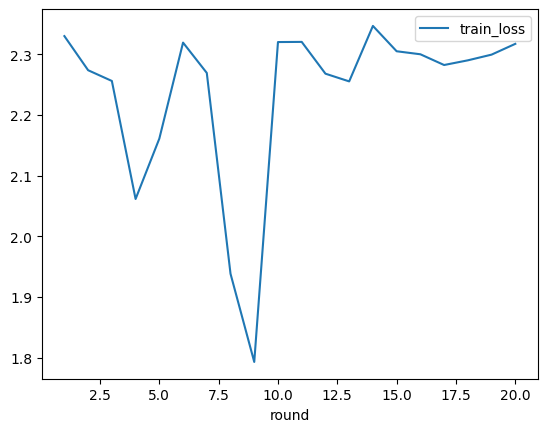

In [8]:
train_df.plot(kind="line", x="round", y="train_loss")